# AutoscoutDataAnalysis

## Descriptive statistics: correlation analysis between features and target values

## Authors : 
- Mozerski Alex
- Fraile Diego
- Spycher Damian

### Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import networkx as nx
import ipywidgets as widgets
from IPython.display import display, clear_output


### Constant

In [45]:
DATA_FILE = os.path.join(os.getcwd(), 'cleaned_cars.csv')

### Data Loading

In [46]:
df = pd.read_csv(DATA_FILE, header=[0], index_col=0)



### Overview of the dataset

In [47]:
df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
url,,,,,,,,,,,,,,,,,,,,
https://www.autoscout24.com/offers/alfa-romeo-159-berlina-2-0-jtdm-super-diesel-red-7140b39f-39f8-4707-833e-3ac1344299b2,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
https://www.autoscout24.com/offers/alfa-romeo-159-1-8-tbi-elegante-gasoline-red-edd10d3e-53b3-4201-9d2b-73216507df12,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
https://www.autoscout24.com/offers/renault-others-dauphin-gasoline-yellow-762bffc3-b9b0-4c4b-b14d-f066356eb926,renault,unknown,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
https://www.autoscout24.com/offers/opel-antara-2-4-16v-temptation-trekhaak-gasoline-black-09934fcb-5180-47e3-9c90-e1cdb6215977,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
https://www.autoscout24.com/offers/alfa-romeo-giulia-2-0-turbo-automatik-ti-q4-leder-navi-kamera-gasoline-white-7e452f2c-a446-4b1d-a072-20462e8d2d2b,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de


In [48]:
df.describe()

,price,mileage,power,engine_size,doors,seats,emission_class,year
count,1.541700e+04,1.523600e+04,15181.000000,13791.000000,11153.000000,14088.000000,9369.000000,14699.000000
mean,8.717987e+04,7.117950e+04,256.870167,2507.132478,4.290146,4.411982,165.123236,2015.442819
std,8.617858e+05,1.320484e+05,192.395857,1694.875540,1.122959,1.142718,93.648451,10.635408
min,1.000000e+00,0.000000e+00,1.000000,0.000000,2.000000,2.000000,0.000000,1923.000000
25%,1.499900e+04,1.800000e+04,122.000000,1496.000000,4.000000,4.000000,115.000000,2014.000000
50%,2.499000e+04,5.461550e+04,179.000000,1987.000000,5.000000,5.000000,139.000000,2019.000000
75%,4.690000e+04,1.025000e+05,326.000000,2993.000000,5.000000,5.000000,191.000000,2021.000000
max,1.000000e+08,9.999999e+06,1600.000000,67500.000000,5.000000,7.000000,2370.000000,2024.000000


In [49]:
print("Missing data in each column:")

print(df.isnull().sum())

Missing data in each column:
brand                  0
model                  0
price                  0
mileage              181
fuel_type             26
color                110
gearbox              401
power                236
engine_size         1626
seller                 0
body_type              0
doors               4264
seats               1329
drivetrain          3886
emission_class      6048
condition              0
upholstery          4414
upholstery_color    3964
year                 718
country                0
dtype: int64


## Analysis of numeric features

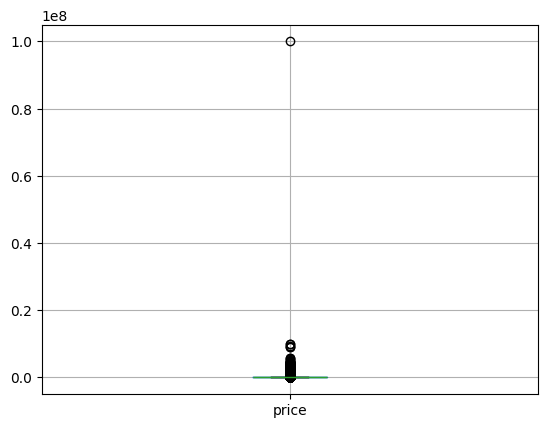

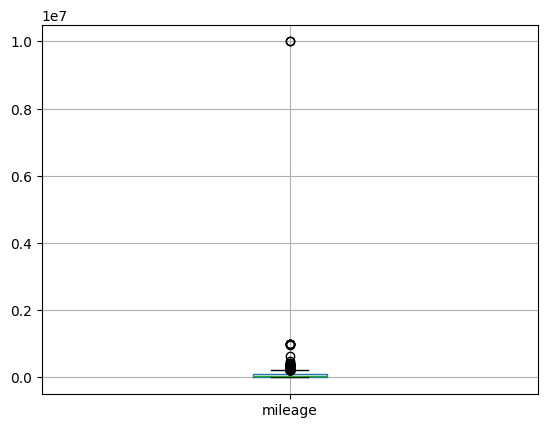

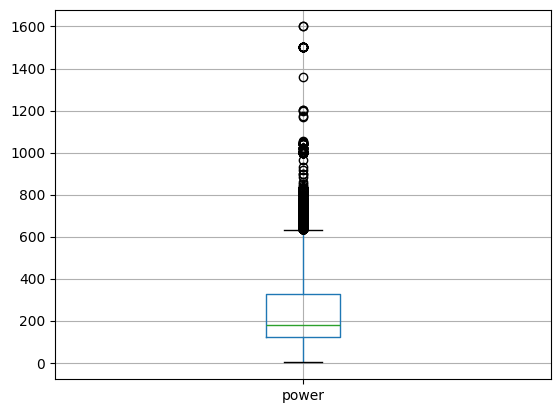

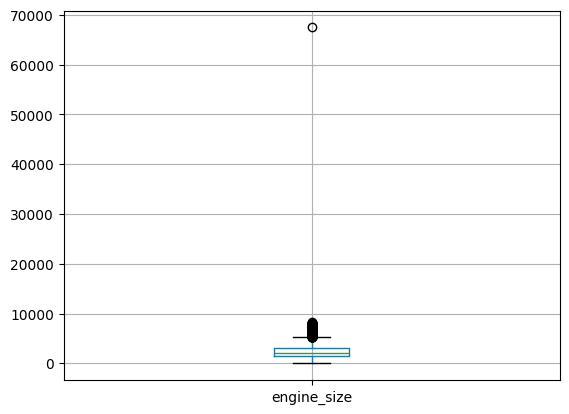

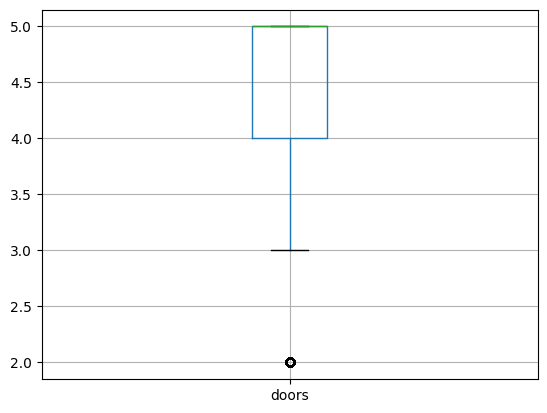

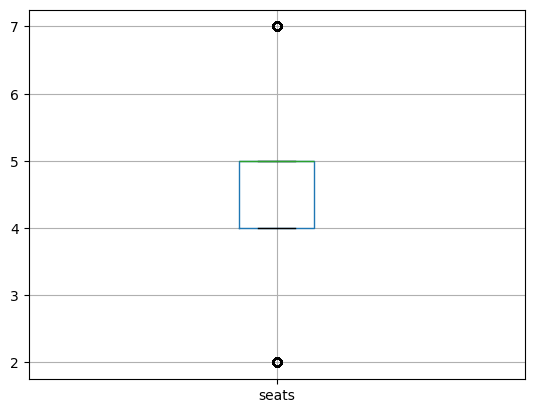

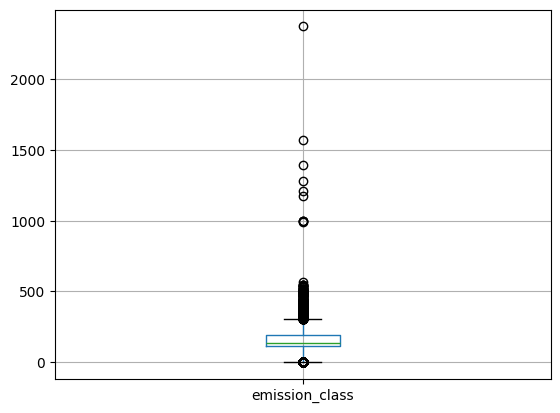

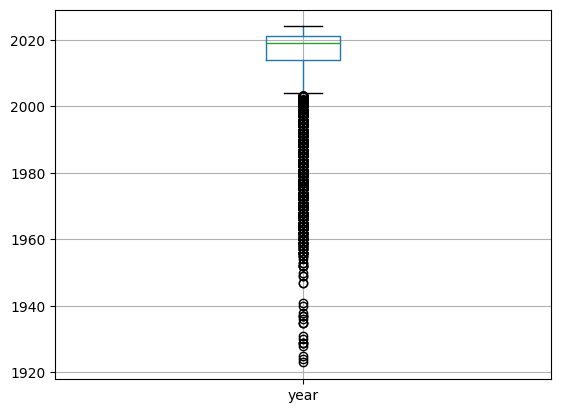

In [50]:
# keep only the numerical columns
df_only_numerical = df.select_dtypes(include = ['float64', 'int64'])

# analyze the outliers
for i in df_only_numerical.columns:
    plt.figure()
    df.boxplot(i)
    plt.show()

### cleaned the outliers

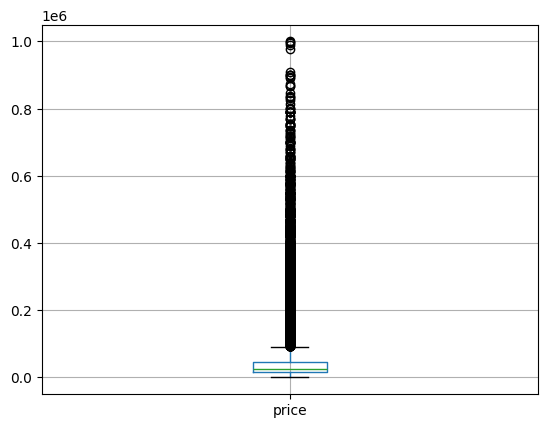

In [51]:
# Remove prices above 1'000'000
df = df[df['price'] < 1000000]

df_only_numerical = df_only_numerical[df_only_numerical['price'] < 1000000]

df_analysis = df.copy()
# Plot the boxplot again
plt.figure()
df.boxplot('price')
plt.show()

### Correlation

#### 1. Analyze all pairs of features

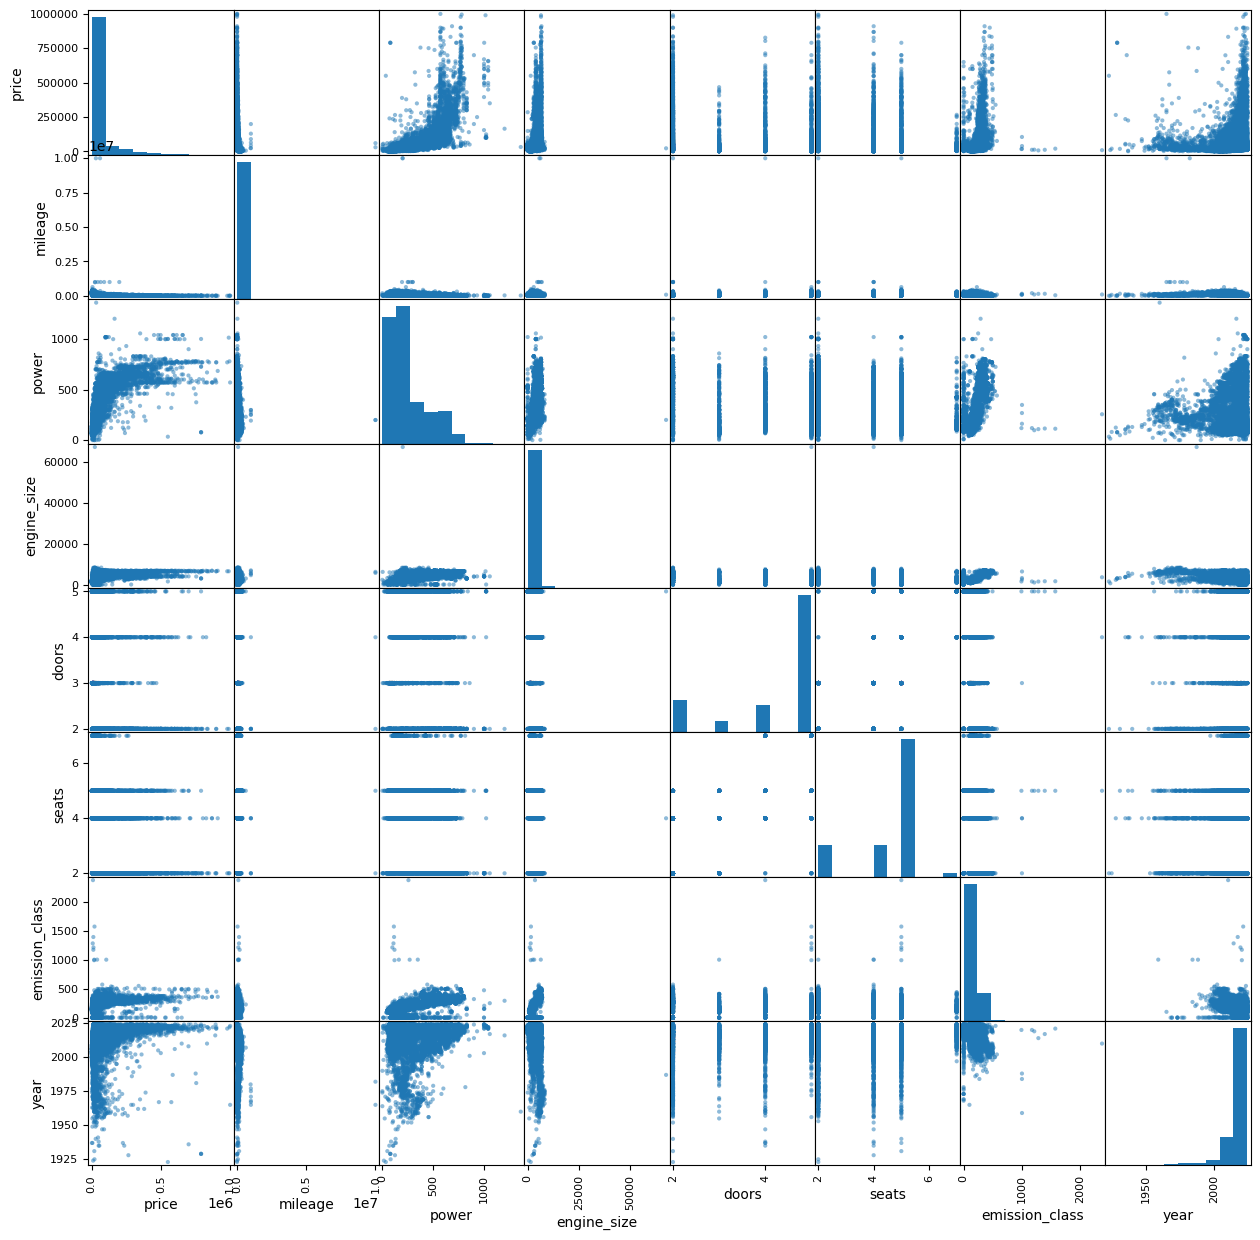

In [52]:
# Plot the scatter matrix
pd.plotting.scatter_matrix(df_only_numerical, figsize=(15, 15))
plt.show()

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

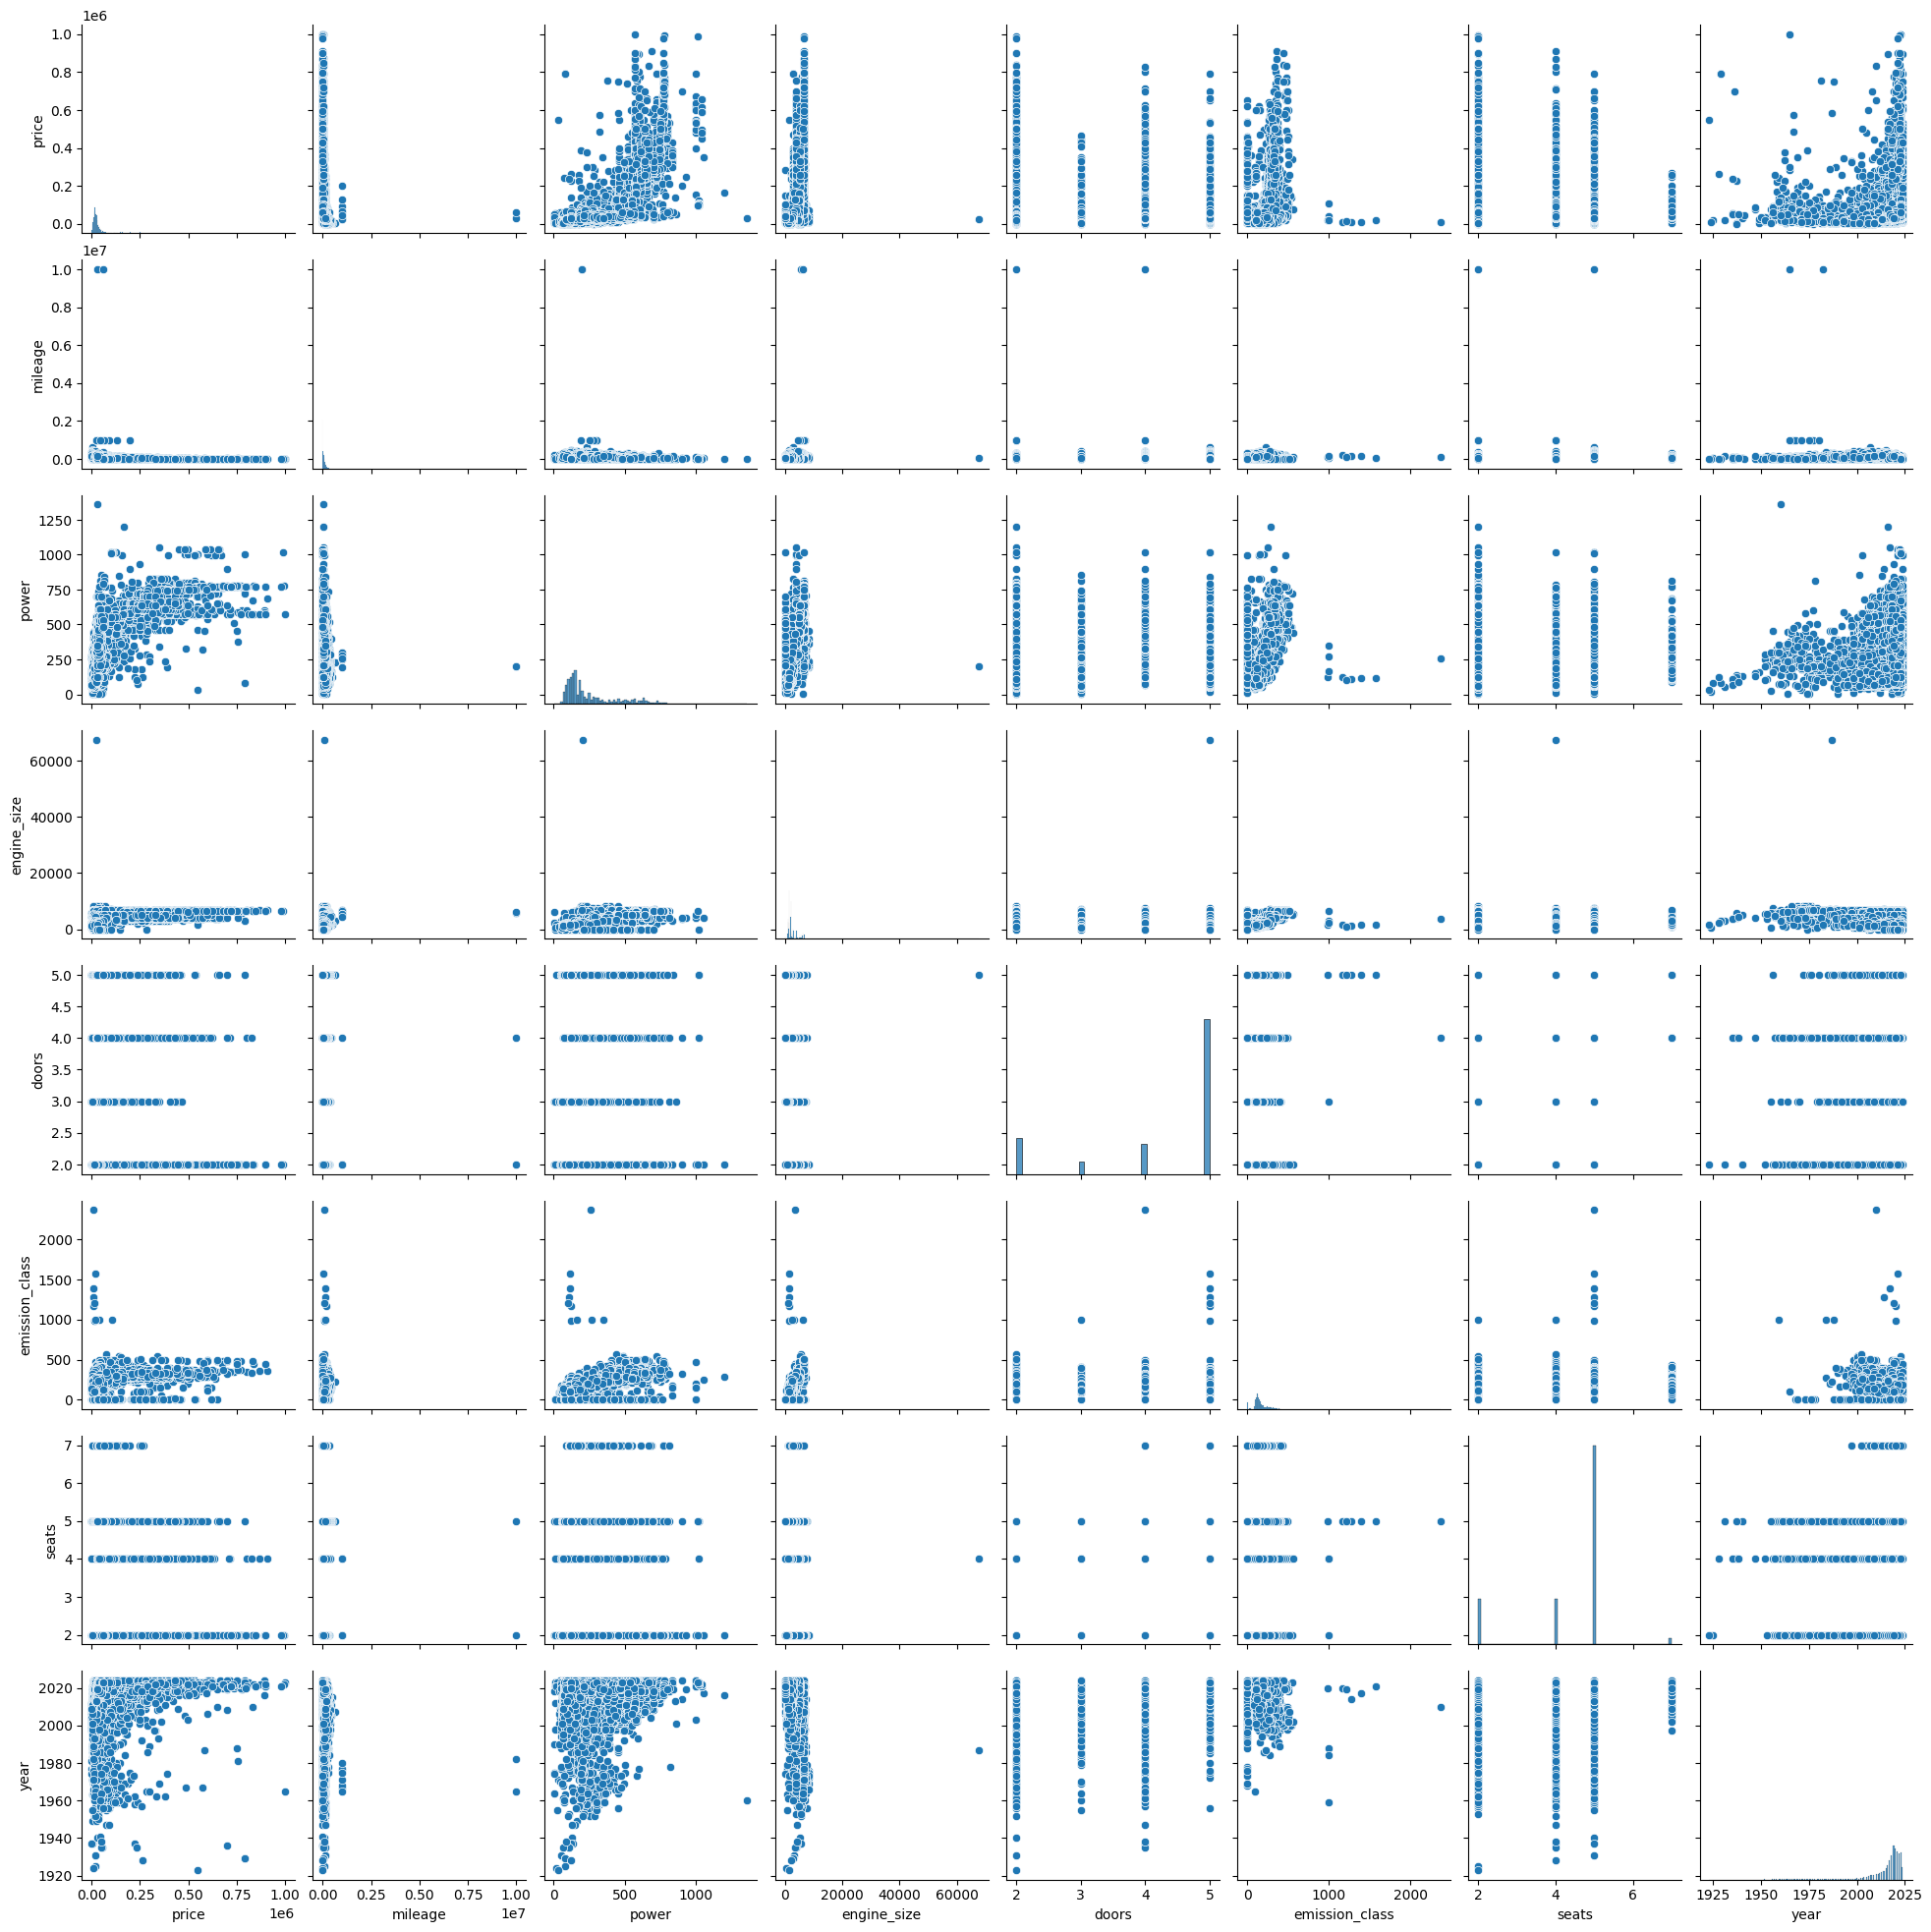

In [53]:
# Plot the pairplot
sns.pairplot(df_only_numerical, vars=['price', 'mileage', 'power', 'engine_size', 'doors', 'emission_class', 'seats', 'year'])
plt.show() 

#### 2. Correlation Matrix with Dendrogram

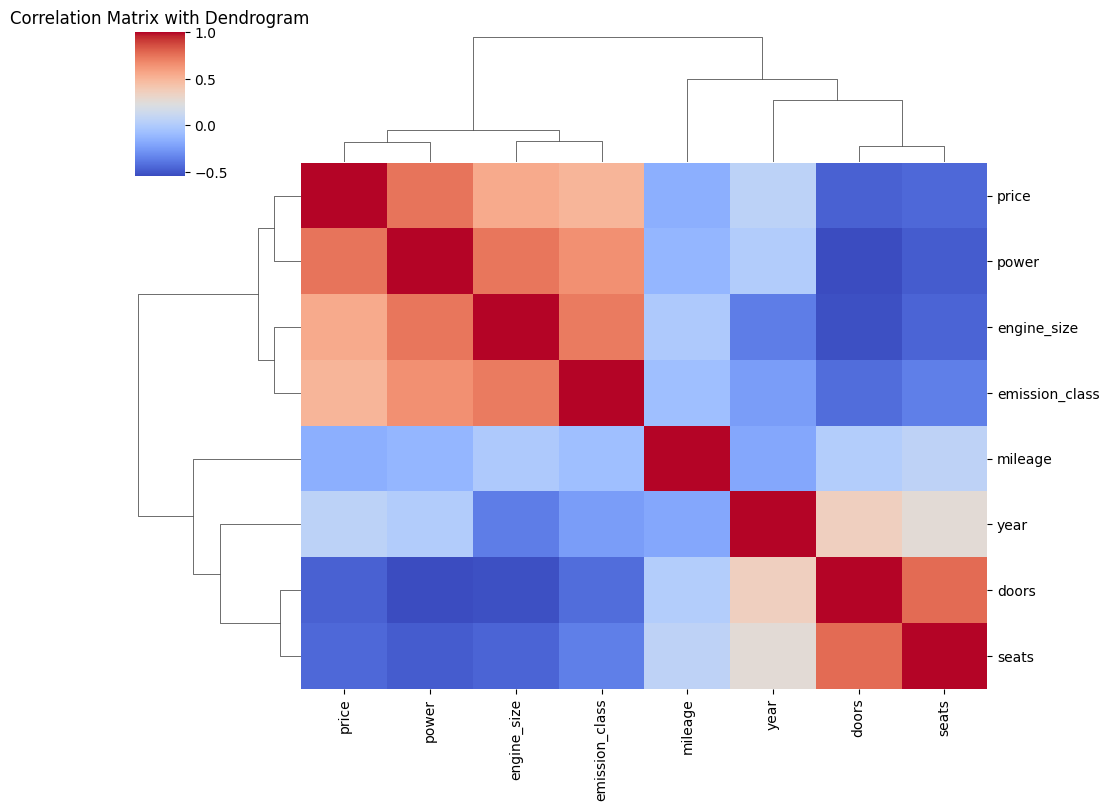

In [54]:
# keep only the numerical columns
corr = df_only_numerical.corr()
sns.clustermap(corr, cmap='coolwarm', figsize=(10, 8))
plt.title('Correlation Matrix with Dendrogram')
plt.show()

#### 3. Netwrork graph for correlation

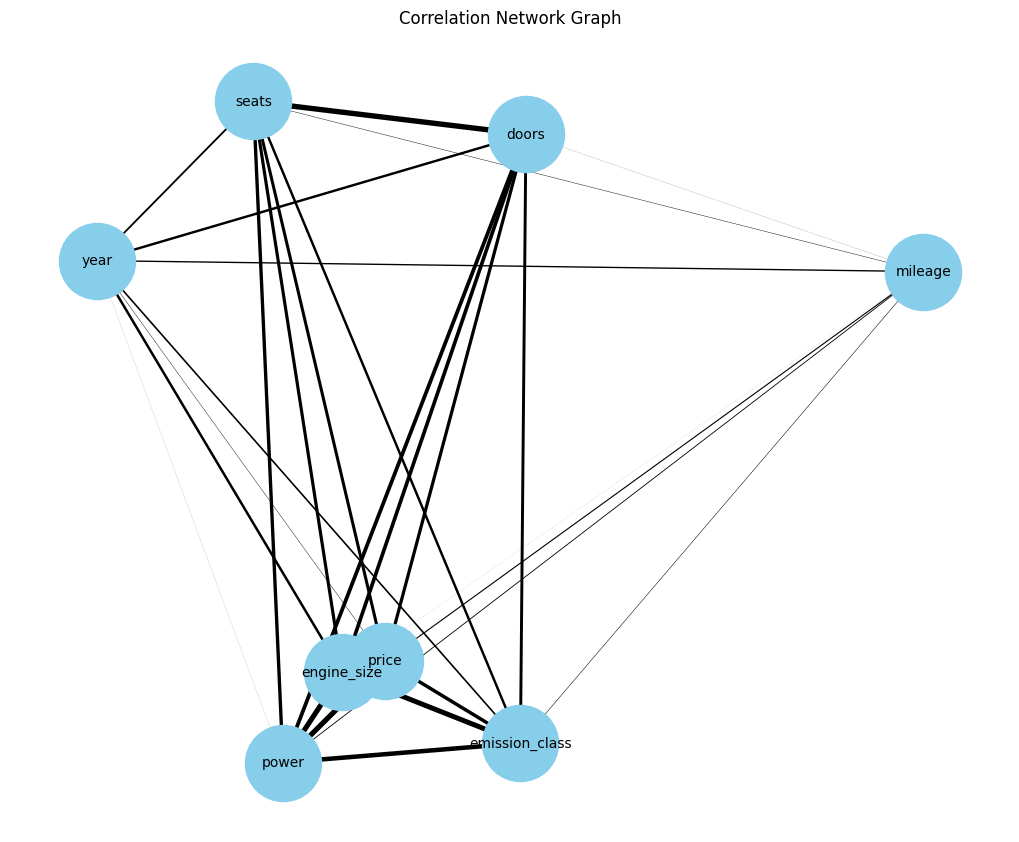

In [55]:
G = nx.Graph()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        G.add_edge(corr.columns[i], corr.columns[j], weight=corr.iloc[i, j])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]
nx.draw(G, pos, edgelist=edges, width=weights, with_labels=True, node_color='skyblue', node_size=3000, font_size=10)
plt.title('Correlation Network Graph')
plt.show()

4. Pearson correlation

In [56]:
pearson_corr = df_only_numerical.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

Pearson Correlation Matrix:
                   price   mileage     power  engine_size     doors     seats  \
price           1.000000 -0.161739  0.745619     0.542487 -0.465754 -0.439929   
mileage        -0.161739  1.000000 -0.123796    -0.007643  0.016596  0.062467   
power           0.745619 -0.123796  1.000000     0.738000 -0.542017 -0.482382   
engine_size     0.542487 -0.007643  0.738000     1.000000 -0.528689 -0.454567   
doors          -0.465754  0.016596 -0.542017    -0.528689  1.000000  0.773019   
seats          -0.439929  0.062467 -0.482382    -0.454567  0.773019  1.000000   
emission_class  0.499735 -0.076054  0.648790     0.720124 -0.423127 -0.355397   
year            0.059909 -0.197275  0.011869    -0.364500  0.349984  0.264708   

                emission_class      year  
price                 0.499735  0.059909  
mileage              -0.076054 -0.197275  
power                 0.648790  0.011869  
engine_size           0.720124 -0.364500  
doors                -0.423

#### 5. Spearman Correlation Matrix

In [57]:
spearman_corr = df_only_numerical.corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)

Spearman Correlation Matrix:
                   price   mileage     power  engine_size     doors     seats  \
price           1.000000 -0.542091  0.813186     0.645429 -0.378663 -0.318642   
mileage        -0.542091  1.000000 -0.194618    -0.001412  0.062384  0.122913   
power           0.813186 -0.194618  1.000000     0.835176 -0.445874 -0.341805   
engine_size     0.645429 -0.001412  0.835176     1.000000 -0.506796 -0.384300   
doors          -0.378663  0.062384 -0.445874    -0.506796  1.000000  0.729883   
seats          -0.318642  0.122913 -0.341805    -0.384300  0.729883  1.000000   
emission_class  0.520437 -0.076835  0.676972     0.694475 -0.403853 -0.297236   
year            0.320354 -0.678615  0.007576    -0.243537  0.285175  0.245526   

                emission_class      year  
price                 0.520437  0.320354  
mileage              -0.076835 -0.678615  
power                 0.676972  0.007576  
engine_size           0.694475 -0.243537  
doors                -0.40

## Results of analyzing
1. Strong predictors of price: features like **power**, **engine size**, and **emission class** are closely linked to **price**.. It suggests they are significant in determining car prices, likely because they reflect the car's performance and compliance with environmental standards.
2. The correlation between **power and engine size** is a fundamental mechanical relationship. They would be very effective due to their strong correlation with price. 



## Analysis of trends (prices by country, by brand, by body, by fuel type, by year, by number of kilometres, etc.).

### 1. Analysis of Car Prices by Country
We have 8 countries in this dataset:

- Italy: IT
- Spain: ES
- Belgium: BE
- Netherlands: NL
- Germany: DE
- Austria: AT
- France: FR
- Luxembourg: LU

Following this analysis, we decided to visualise the breakdown of car prices by country (see sub-graph). We can see that most cars are priced between €10,000 and €30,000, with the exception of France and Luxembourg. This may be due to several factors. Firstly, we scrapped autoscout.com and there is autoscout.fr which probably contains more regular French offers.

We are also more interested in the median price as some cars are extremely more expensive than others. Unsurprisingly, the countries with the highest median are also Luxembourg and France.

In [58]:
countries = df_analysis['country'].unique()
print(countries)

['it' 'es' 'be' 'nl' 'de' 'at' 'fr' 'lu']


In [59]:
# take a look at the mean, median, min and max price for italia country
country_data = df_analysis[df_analysis['country'] == "it"]

mean = country_data['price'].mean()
median = country_data['price'].median()
min = country_data['price'].min()
max = country_data['price'].max()

print(f"  The mean price is {mean:.2f} Euros")
print(f"  The median price for a car is: {median:.2f} Euros")
print(f"  The minimum price: {min:.2f} Euros")
print(f"  And the maximum price: {max:.2f} Euros")

  The mean price is 36110.74 Euros
  The median price for a car is: 18500.00 Euros
  The minimum price: 500.00 Euros
  And the maximum price: 790000.00 Euros


##### Car price distribution by country

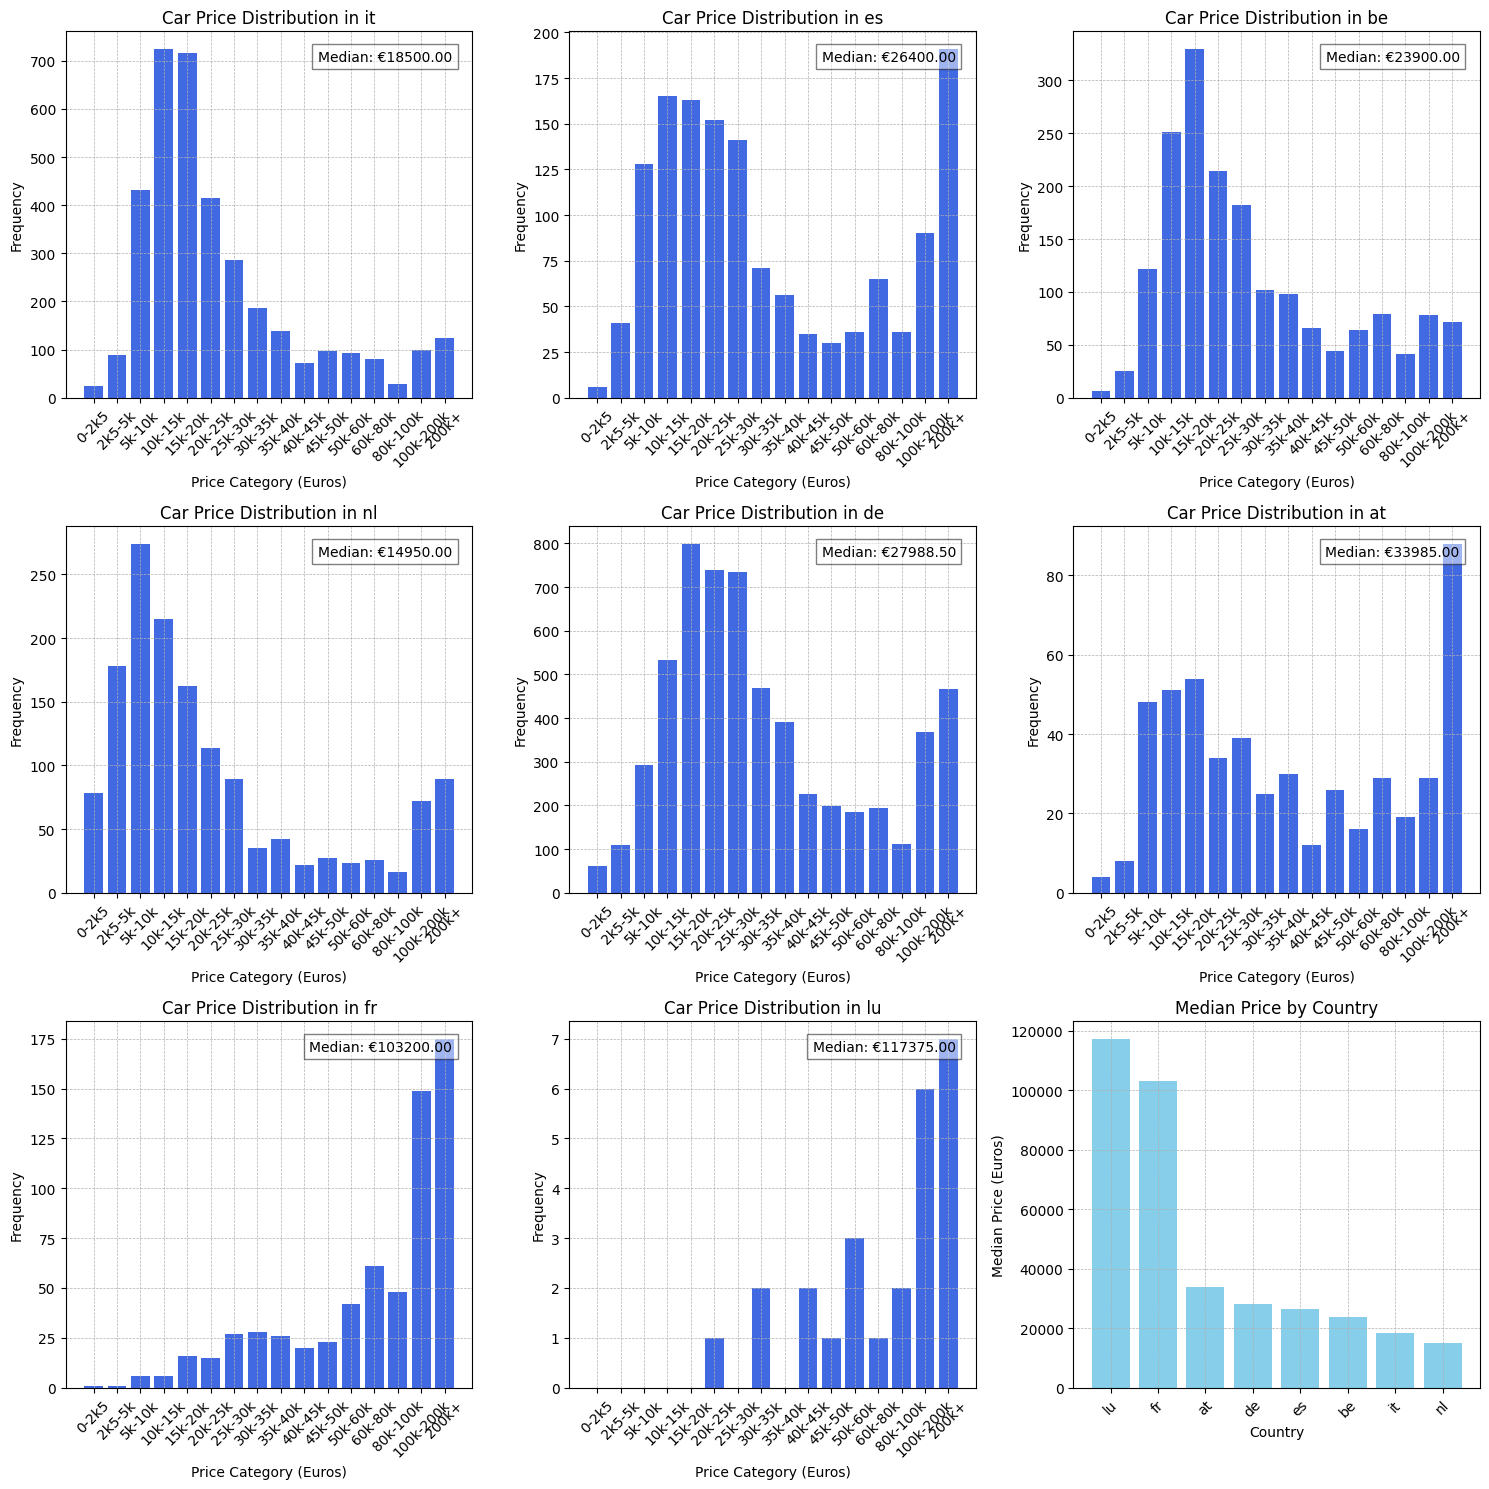

In [60]:

# Define bins and labels for price categories
bins = [0, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 80000, 100000, 200000, np.inf]
labels = ['0-2k5', '2k5-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-60k', '60k-80k', '80k-100k', '100k-200k', '200k+']

# Function to categorize prices into bins
def price_cat(df, country):
    
    # Applying binning only to the rows of the specified country
    country_mask = df['country'] == country
    df.loc[country_mask, 'price_bin'] = pd.cut(df.loc[country_mask, 'price'], bins=bins, labels=labels)
    return df.loc[country_mask, 'price_bin']

# Initialize the layout for the plots
nCountry = len(countries)
cols = 3
rows = (nCountry + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot price distribution for each country
for index, country in enumerate(countries):
        ax = axes[index]
        
        df_analysis['price_bin'] = price_cat(df_analysis, country)
        price_counts = df_analysis[df_analysis['country'] == country]['price_bin'].value_counts().sort_index()

        ax.bar(price_counts.index, price_counts.values, color='royalblue')
        ax.set_title(f'Car Price Distribution in {country}')
        ax.set_xlabel('Price Category (Euros)')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Adding the median price text
        median_price = df_analysis[df_analysis['country'] == country]['price'].median()
        ax.text(0.95, 0.95, f'Median: €{median_price:.2f}', transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


# Display median prices in a separate plot
med_prices = df_analysis.groupby('country')['price'].median().sort_values(ascending=False)
ax = axes[-1] 
ax.bar(med_prices.index, med_prices.values, color='skyblue')
ax.set_title('Median Price by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Median Price (Euros)')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5)

for idx in range(index + 1, len(axes) - 1):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

df_analysis.drop('price_bin', axis=1, inplace=True)


### 2. Analysis of Car prices by Brand
Our dataset comprises vehicle listings from 41 distinct automotive brands, including a mix of everyday consumer brands and high-end luxury manufacturers. The brands analyzed include 'alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen' 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley' 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda' 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini' 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda' 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla'.


**Median price comparison across brands**

The median price for each brand was calculated to provide a measure of central tendency that is less sensitive to outliers and extreme values, which are common in automotive pricing data. Notably, Lamborghini emerged as the brand with the highest median price, which aligns with its market positioning as a manufacturer of ultra-luxury, high-performance vehicles. Conversely, Smart was identified as the brand with the lowest median price.



In [61]:
brands = df_analysis['brand'].unique()
print("There are ", brands.size, " brands")
print(brands)

There are  41  brands
['alfa romeo' 'renault' 'opel' 'chevrolet' 'cadillac' 'citroen' 'audi'
 'ferrari' 'cupra' 'bugatti' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']


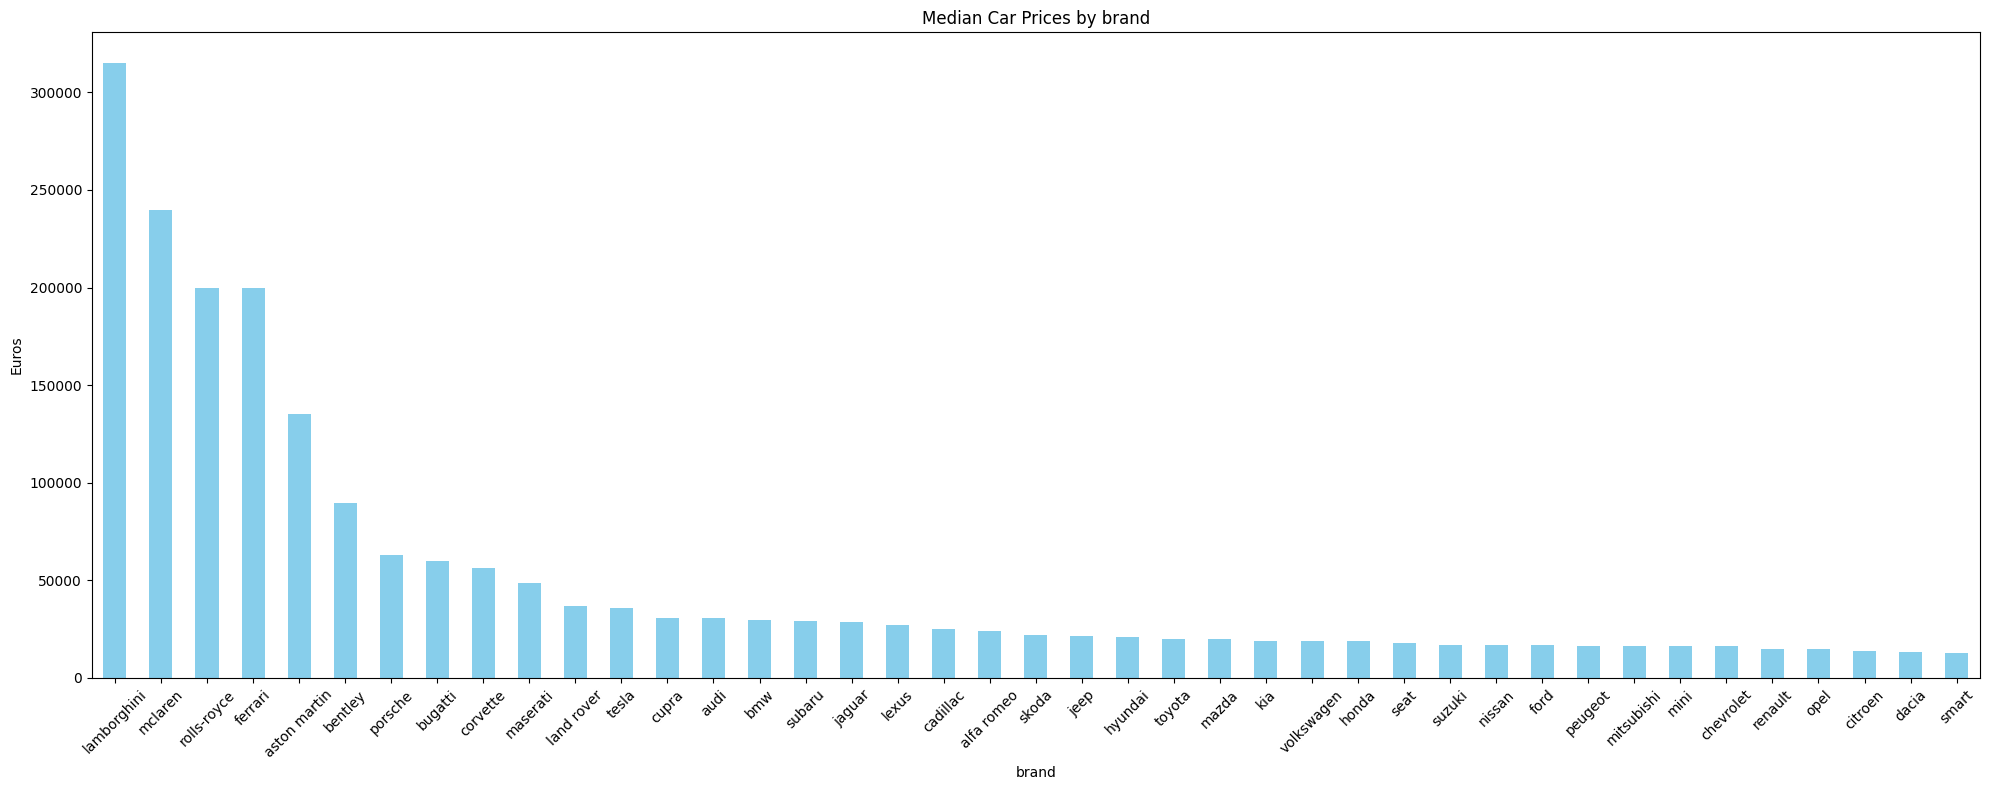

brand
lamborghini     315000.0
mclaren         239900.0
rolls-royce     199970.0
ferrari         199800.0
aston martin    135000.0
Name: price, dtype: float64


In [62]:
# Car analysis
med_prices = df_analysis.groupby('brand')['price'].median().sort_values(ascending=False)

# Plot
plt.figure(figsize=(20, 8))  
med_prices.plot(kind='bar', color='skyblue')
plt.title('Median Car Prices by brand')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

print(med_prices.head())

##### Median price plots by model for each rand

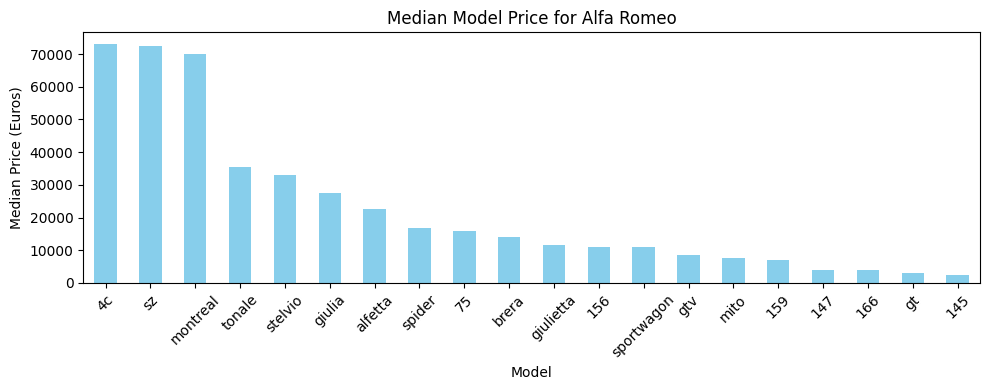

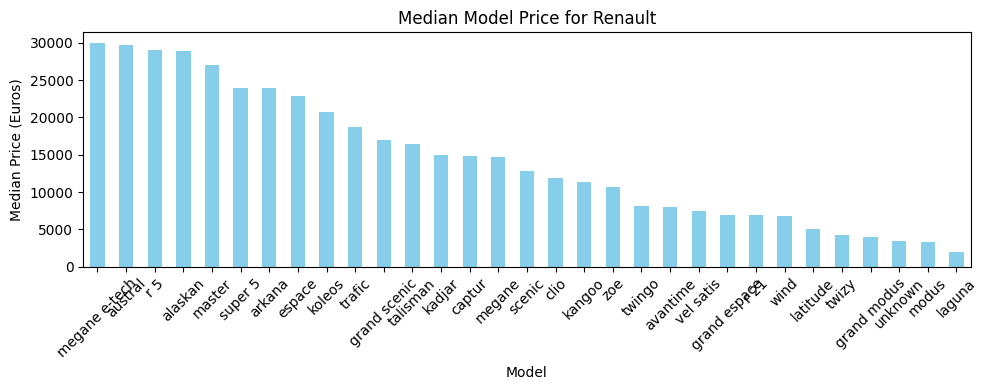

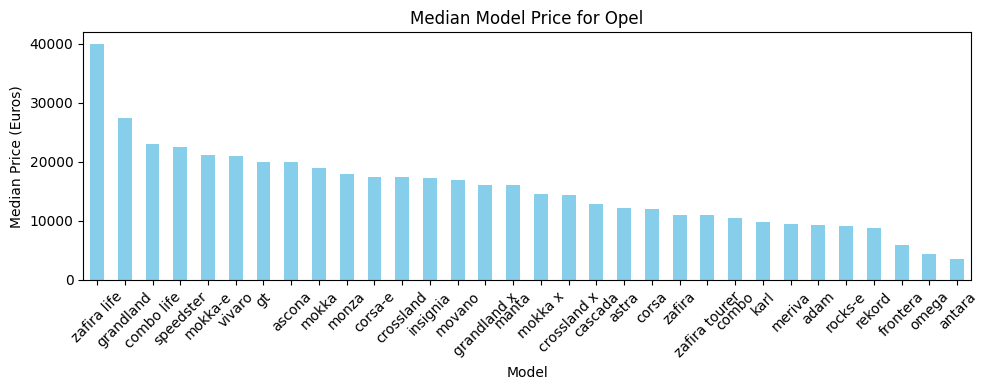

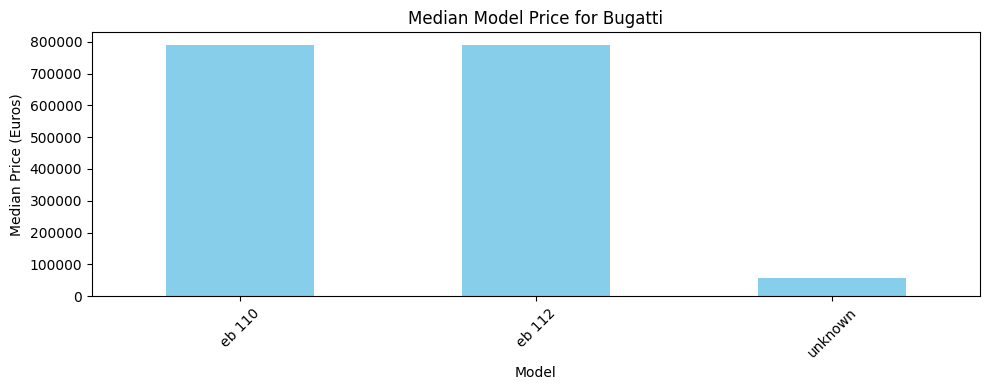

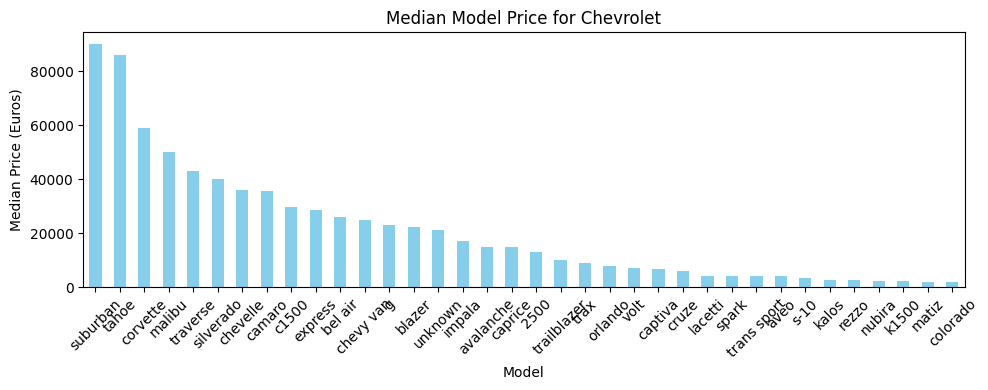

In [63]:
# List of brands as provided
brands = ['alfa romeo', 'renault', 'opel', 'bugatti', 'chevrolet', 'cadillac', 'citroen',
          'audi', 'ferrari', 'cupra', 'aston martin', 'dacia', 'corvette', 'bentley',
          'volkswagen', 'ford', 'bmw', 'honda', 'jeep', 'land rover', 'mazda',
          'mitsubishi', 'nissan', 'porsche', 'mclaren', 'hyundai', 'maserati', 'mini',
          'peugeot', 'rolls-royce', 'lexus', 'lamborghini', 'kia', 'jaguar', 'skoda',
          'smart', 'subaru', 'suzuki', 'seat', 'toyota', 'tesla']

# example with 5 brands
for brand in brands[:5]:
    brand_data = df_analysis[df_analysis['brand'] == brand]
    model_in_brand_med_price = brand_data.groupby('model')['price'].median().sort_values(ascending=False)

    # Plot configuration for a more compact figure
    plt.figure(figsize=(10, 4))
    model_in_brand_med_price.plot(kind='bar', color='skyblue')
    plt.title(f'Median Model Price for {brand.title()}')
    plt.xlabel('Model')
    plt.ylabel('Median Price (Euros)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### INTERACTIVE Median price plots by model for each brand

Dropdown(description='Brand:', index=31, options=('alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw', 'bug…

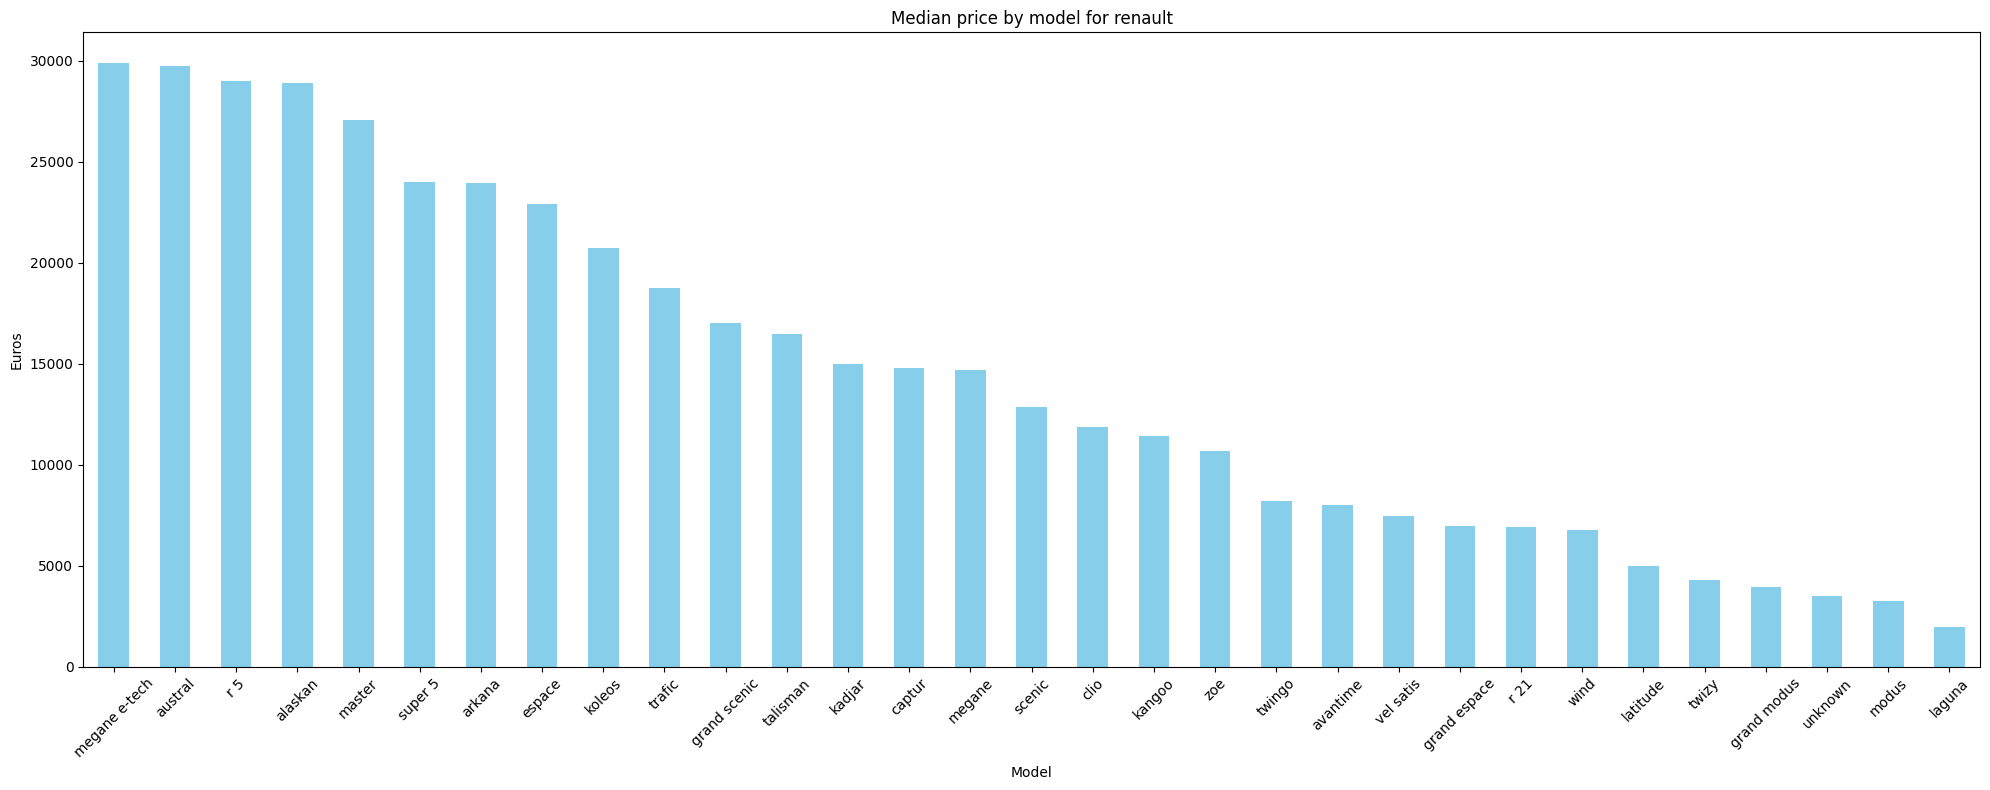

In [64]:
brand_selector = widgets.Dropdown(
    options=sorted(brands),
    value='renault',  # Default value
    description='Brand:',
    disabled=False,
)

def update_plot(brand):
    clear_output(wait=True)
    display(brand_selector)
    brand_data = df_analysis[df_analysis['brand'] == brand]
    model_in_brand_med_price = brand_data.groupby('model')['price'].median().sort_values(ascending=False)

    plt.figure(figsize=(20, 8))
    model_in_brand_med_price.plot(kind='bar', color='skyblue')
    plt.title(f'Median price by model for {brand}')
    plt.xlabel('Model')
    plt.ylabel('Euros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def on_brand_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

brand_selector.observe(on_brand_change)

update_plot(brand_selector.value)

### 3. Analyse Price by year

In our analysis, we utilized the registration date of vehicles to explore price fluctuations over time.
We used the registration date to examine price variations, focusing on the median price. Analyzing daily variations seemed overly detailed. In the first plot, we observed the price variations since the beginning. This line plot, which includes a bar chart in the background representing the volume of data, shows that there are not many cars listed for sale prior to the year 2000. Additionally, some of these vehicles are likely considered collectibles and thus command higher prices.

That's why we created a second plot representing data from the year 2000 to the present. In this plot, we see significant price fluctuations up until 2010, after which the prices begin to rise gradually. This pattern makes sense, as older cars generally become less expensive over time.

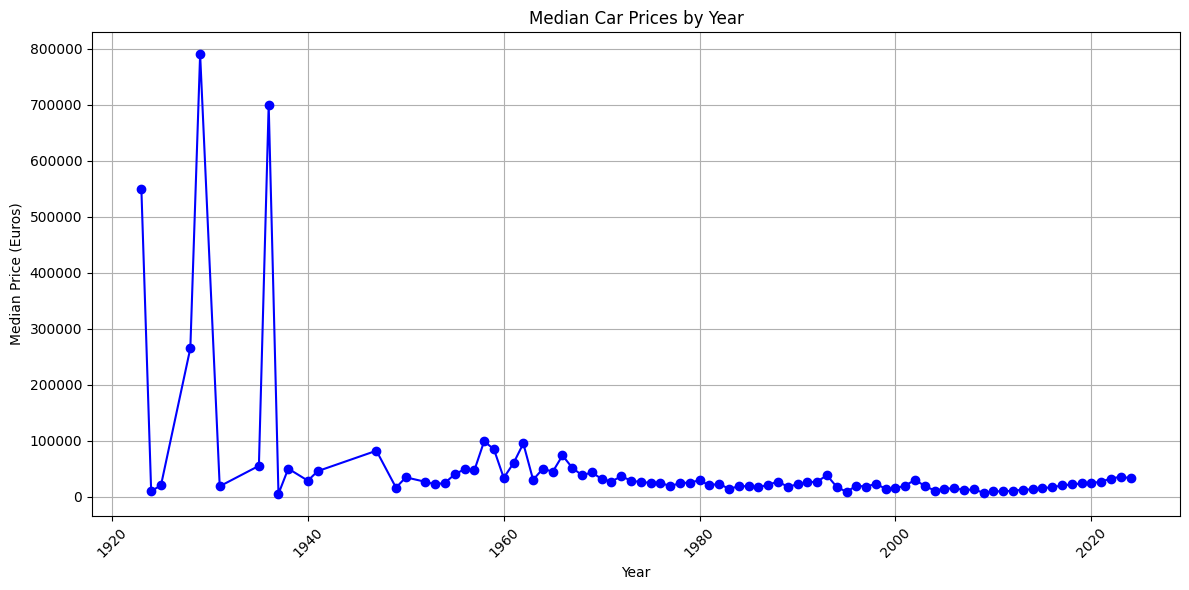

In [65]:
# get the median price by year
med_price_year = df_analysis.groupby('year')['price'].median()

plt.figure(figsize=(12, 6))
plt.plot(med_price_year.index, med_price_year.values, marker='o', linestyle='-', color='b')
plt.title('Median Car Prices by Year')
plt.xlabel('Year')
plt.ylabel('Median Price (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Median car prices and data volume by decade

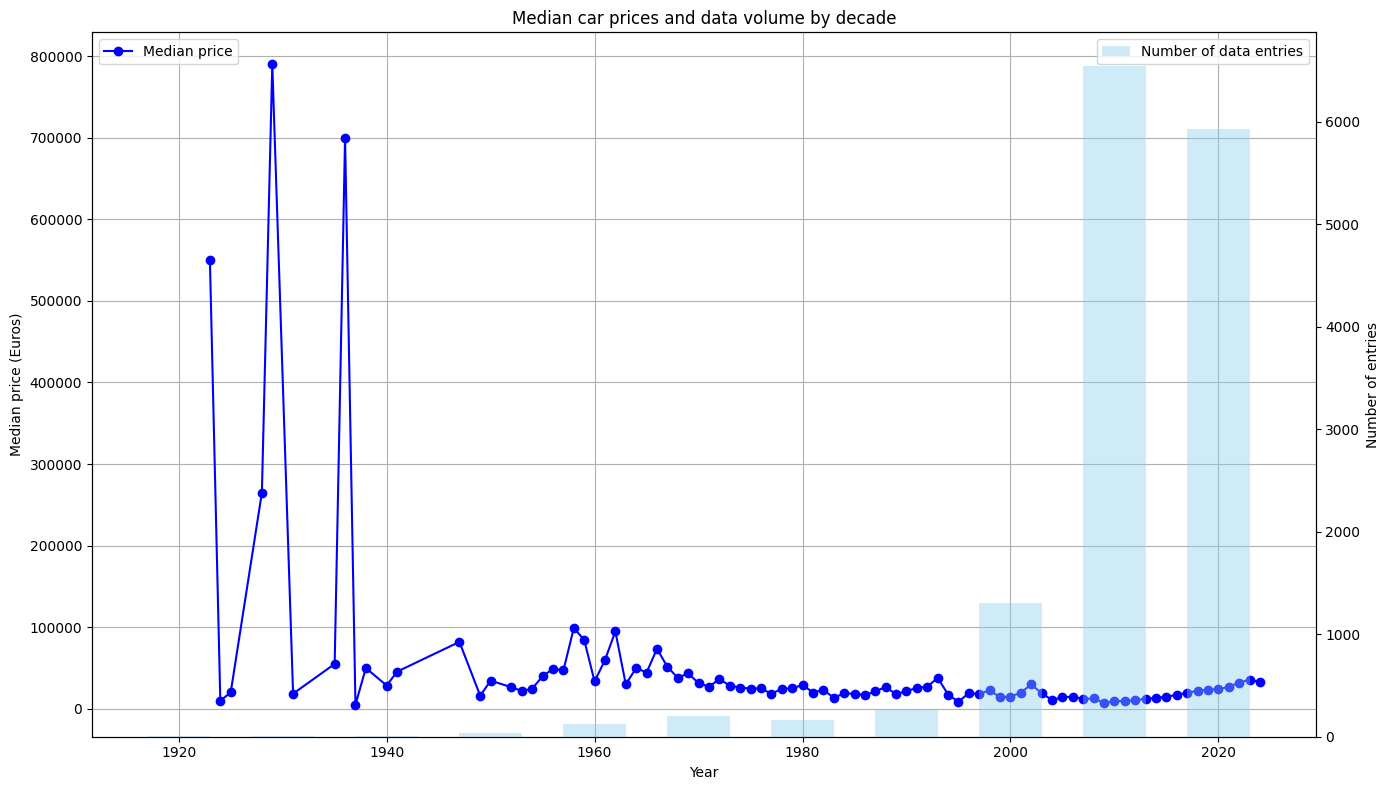

In [66]:
# Create a new column for the decade
df_analysis['decade'] = (df_analysis['year'] // 10) * 10

# Count the number of data entries for each decade
decade_counts = df_analysis['decade'].value_counts().sort_index()

# Plot the median prices by year
plt.figure(figsize=(14, 8))
ax1 = plt.gca()
ax1.plot(med_price_year.index, med_price_year.values, marker='o', linestyle='-', color='b', label='Median price')

# Plot the median prices by decade
ax1.set_xlabel('Year')
ax1.set_ylabel('Median price (Euros)')
ax1.set_title('Median car prices and data volume by decade')
ax1.grid(True)

ax2 = ax1.twinx()

# Plot the data volume as a bar chart
ax2.bar(decade_counts.index, decade_counts.values, width=6, alpha=0.4, color='skyblue', label='Number of data entries')
ax2.set_ylabel('Number of entries')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Annual median car prices and data volume from 2000 onwards

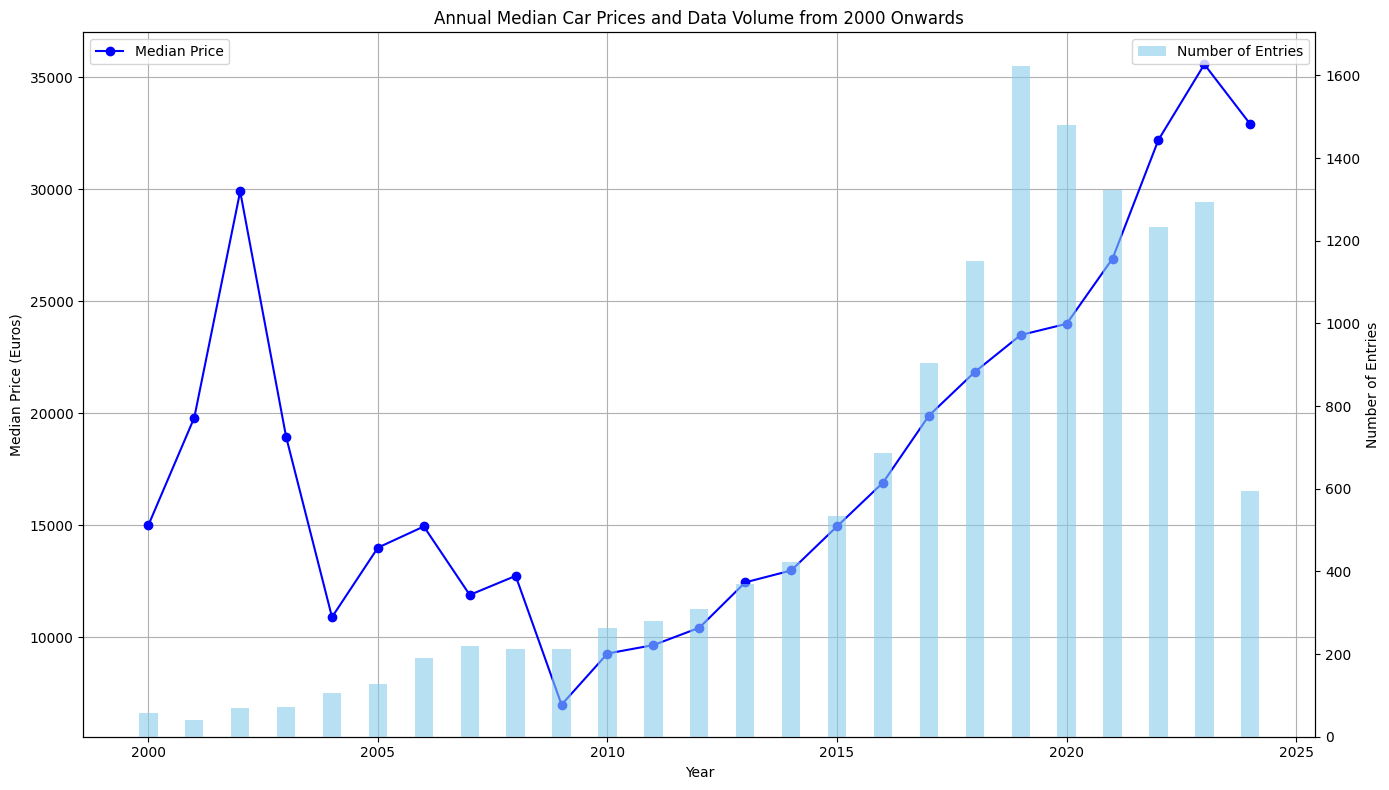

In [67]:
# Filter the DataFrame to include only data from the year 2000 onwards
df_2000_onwards = df_analysis[df_analysis['year'] >= 2000]

# Calculate the median price per year
med_price_year_2000_onwards = df_2000_onwards.groupby('year')['price'].median()

# Calculate the count of entries per year
yearly_counts_2000_onwards = df_2000_onwards['year'].value_counts().sort_index()

# Create a figure and primary axis
plt.figure(figsize=(14, 8))
ax1 = plt.gca()
ax1.plot(med_price_year_2000_onwards.index, med_price_year_2000_onwards.values, marker='o', linestyle='-', color='b', label='Median Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Price (Euros)')
ax1.set_title('Annual Median Car Prices and Data Volume from 2000 Onwards')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.bar(yearly_counts_2000_onwards.index, yearly_counts_2000_onwards.values, width=0.4, alpha=0.6, color='skyblue', label='Number of Entries')
ax2.set_ylabel('Number of Entries')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### 4. Analyse Price by mileage (km)
To analyze the relationship between car prices and mileage, we first eliminated any data entries lacking mileage information. We then plotted every price as a function of its corresponding mileage in a scatter plot. This visualization revealed a clear trend: as mileage increases, the price generally decreases.

To quantify this trend, we employed the **polyfit function**, which minimizes the squared error, to fit curves to the data. When using a polynomial of the first order, the resulting line intersected the y-axis prematurely. A second-order polynomial suggested an unrealistic increase in price with mileage. However, a third-order polynomial provided a realistic depiction of an exponential decrease in price with increasing mileage, which we decided to use for our analysis.

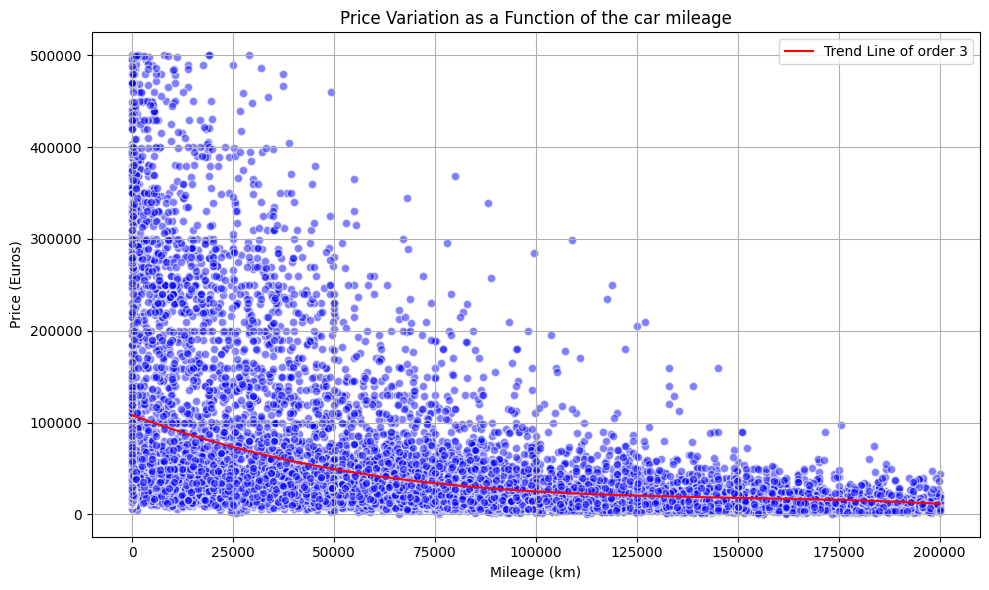

In [80]:
df_mileage = df_analysis[df_analysis['mileage'] != 'unknown']

df_mileage['price'] = pd.to_numeric(df_mileage['price'], errors='coerce')
df_mileage['mileage'] = pd.to_numeric(df_mileage['mileage'], errors='coerce')
df_mileage.dropna(subset=['price', 'mileage'], inplace=True)

#Filter the milage
# We use a threshold to avoid one huge value
price_max = 500000  
df_mileage = df_mileage[df_mileage['price'] <= price_max]

# We use a threshold to avoid one huge value
mileage_max = 200000
df_mileage = df_mileage[df_mileage['mileage'] <= mileage_max]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_mileage['mileage'], df_mileage['price'], alpha=0.5, edgecolors='w', color='blue')
plt.title('Price variation as a function of the car mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (Euros)')
plt.grid(True)

order = 3
coefficients = np.polyfit(df_mileage['mileage'], df_mileage['price'], order)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(df_mileage['mileage'].min(), df_mileage['mileage'].max(), 200)
plt.plot(x_axis, polynomial(x_axis), color='red', label=f'Trend Line of order {order}')
plt.legend()


plt.tight_layout()
plt.show()

### 5. Analyse Price by fuel_type
First, there are eight known fuel types in our dataset, excluding the 'unknown' category: ['diesel', 'gasoline', 'electric', 'lpg', 'electric/gasoline', 'others', 'ethanol', 'electric/diesel', 'cng', 'hydrogen'].

We created two plots: one displaying the median price and the other showing the count of listings for each fuel type.

Key observations include:
- **Gasoline** is the most commonly sold fuel type, followed by **diesel** and then **electric**.
- **Ethanol** fuel types command the highest prices, although they are the least common in the dataset, similar to the 'others' category.
- Considering the more frequently listed fuel types, **electric/diesel** is notably more expensive and ranks as the third most listed on autoscout24.com.

These insights highlight trends in fuel preference and pricing across different types of fuels available in the automotive market.

In [81]:
df_fuel = df_analysis[df_analysis['fuel_type'] != 'unknown']
fuel_types = df_fuel['fuel_type'].unique()
print(fuel_types)

['diesel' 'gasoline' 'electric' 'lpg' 'electric/gasoline' nan 'others'
 'ethanol' 'electric/diesel' 'cng' 'hydrogen']


#### Average price by fuel type

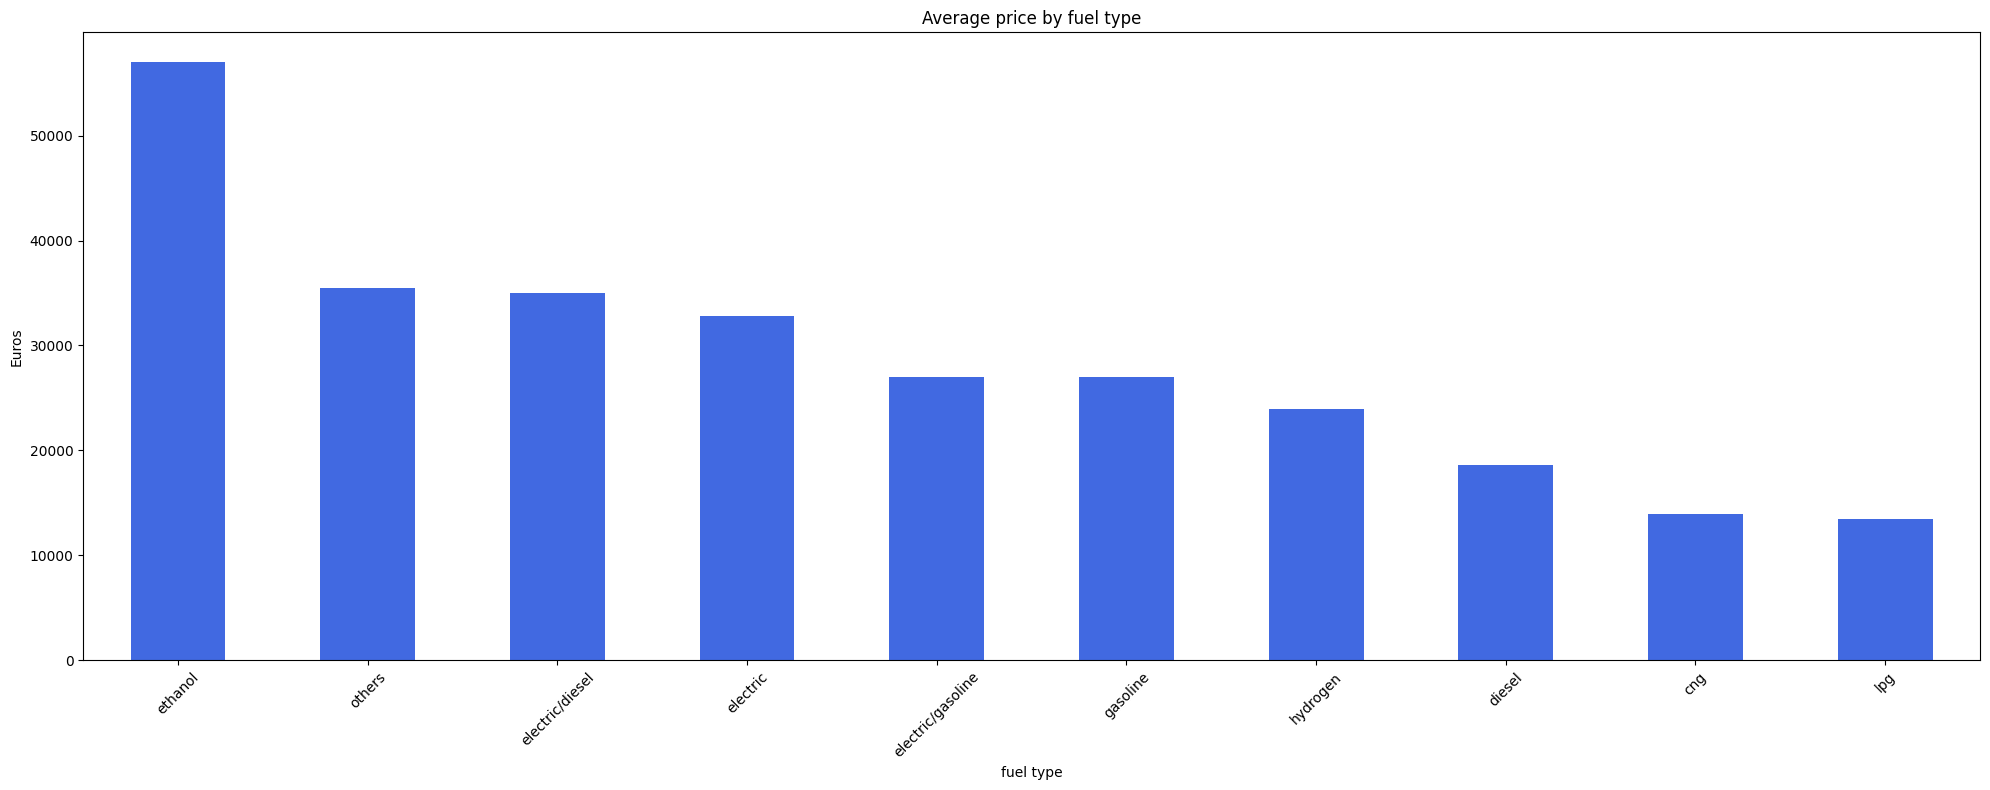

In [87]:
# Fuel analysis
med_fuel_price = df_fuel.groupby('fuel_type')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_fuel_price.plot(kind='bar', color='royalblue')
plt.title('Average price by fuel type')
plt.xlabel('fuel type')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#### Count of the fuel Types in the dataset

fuel_type
gasoline             9032
diesel               3438
electric/gasoline    1468
electric              834
lpg                   203
electric/diesel        51
others                 42
cng                    27
ethanol                 3
hydrogen                3
Name: count, dtype: int64


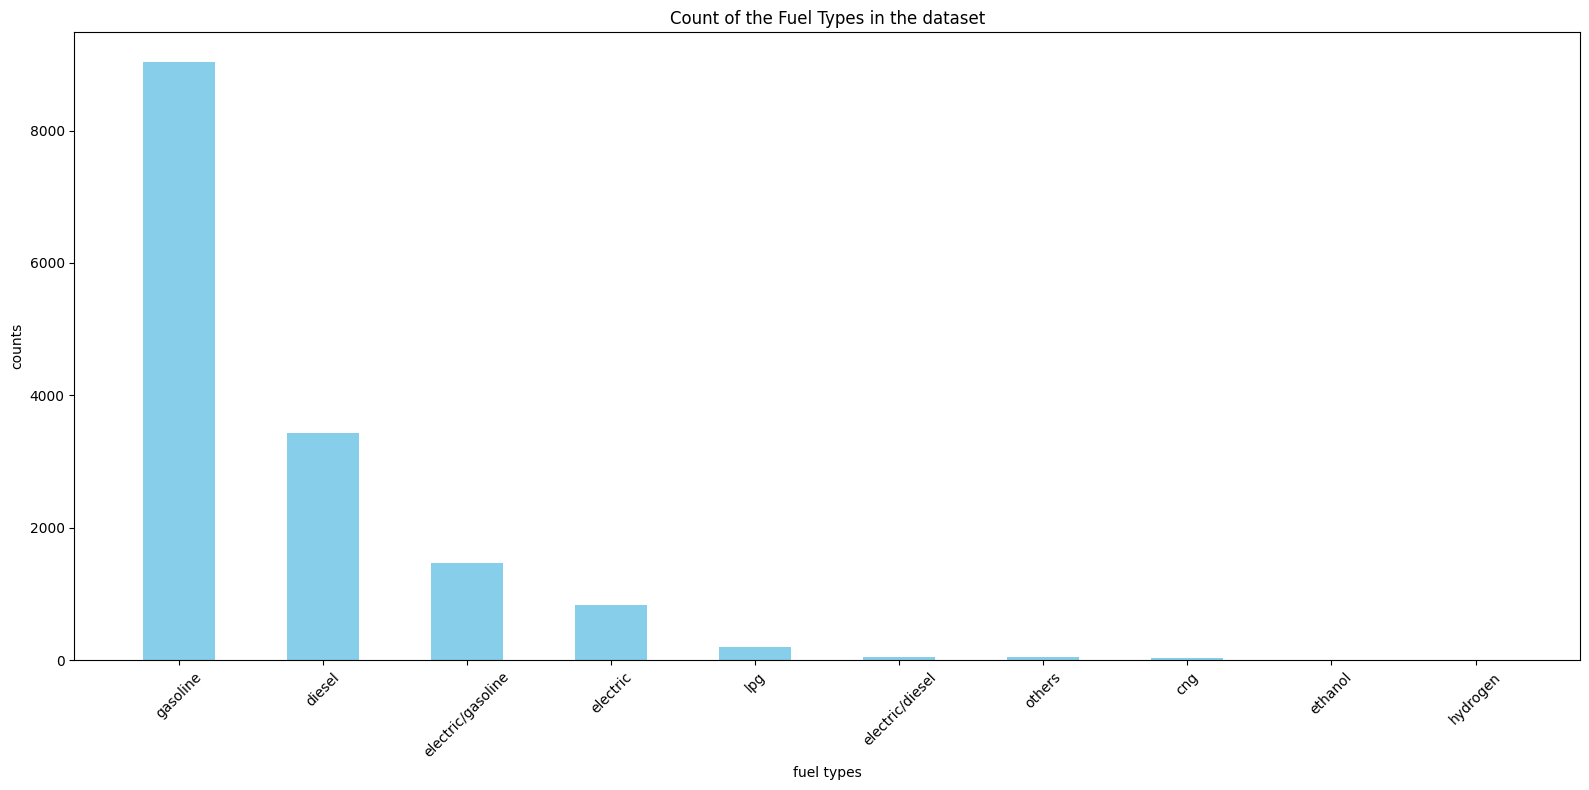

In [88]:
fuel_ticks = med_fuel_price.index   
fuel_type_counts = df_fuel['fuel_type'].value_counts().reindex(fuel_ticks, fill_value=0).sort_values(ascending=False) 
print(fuel_type_counts)
# Plot 
plt.figure(figsize=(16,8))
plt.bar(fuel_type_counts.index, fuel_type_counts.values, width=0.5, alpha=1, color='skyblue')
plt.title('Count of the fuel Types in the dataset')
plt.xlabel('fuel types')
plt.ylabel('counts')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### 6. Analyse Price by body type
Here is the analysis of car prices by body type using our dataset, which includes 9 distinct body types: ['sedan', 'off-road/pick-up', 'other', 'coupe', 'van', 'station wagon', 'convertible', 'compact', 'transporter'].

**Median Price Analysis by Body Type**

Initially, we plotted the median price for each body type. However, this general overview was insufficient for deeper insights. Thus, we opted for an interactive approach to delve into the proportional representation of each body type within different car brands. This allows us to explore which body types are most characteristic of specific brands.

**Interactive Analysis by Brand**

The interactive graph shows the distribution of body types for each brand. This visualization is particularly illuminative, as it aligns well with brand identities. For instance, Jeep predominantly features 'off-road/pick-up' vehicles, which is consistent with the brand’s market positioning and consumer perception.

In [89]:
df_body = df_analysis
body_types = df_body['body_type'].unique()
print(body_types)

['sedan' 'off-road/pick-up' 'coupe' 'van' 'station wagon' 'convertible'
 'compact' 'other' 'transporter']


#### Median price price by body type

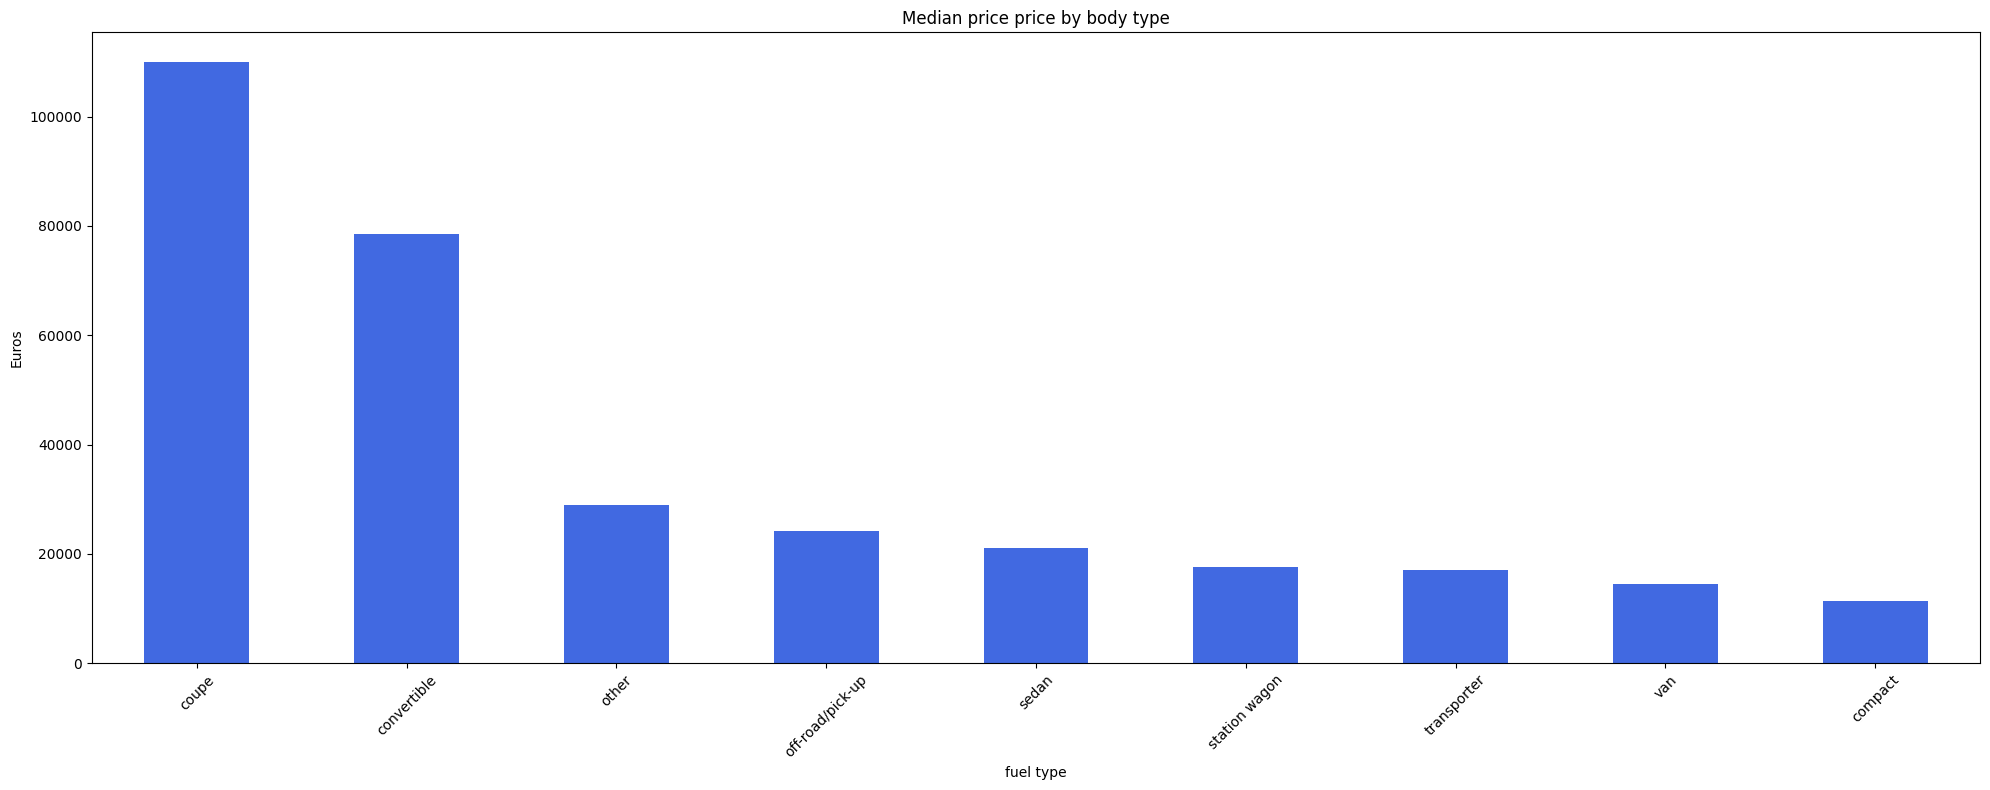

In [91]:
# Fuel analysis median price
med_body_price = df_body.groupby('body_type')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_body_price.plot(kind='bar', color='royalblue')
plt.title('Median price price by body type')
plt.xlabel('fuel type')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#### INTERACTIVE graph Pie of the body type percentil offered in autoscout by brand 

Dropdown(description='Brand:', options=('alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw', 'bugatti', 'ca…

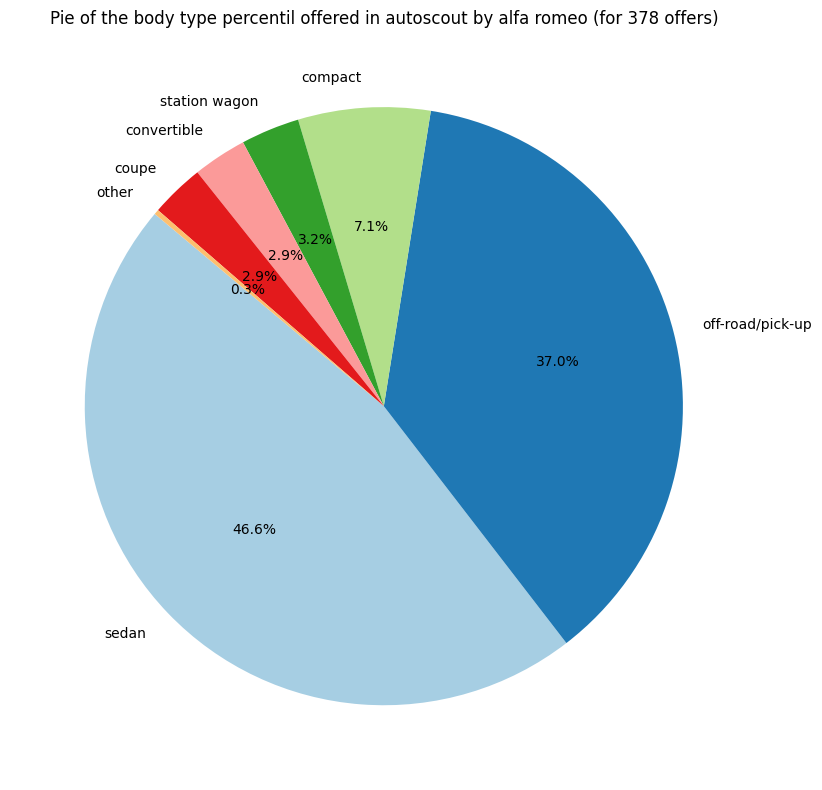

In [92]:
brands = df_body['brand'].unique()

brand_selector = widgets.Dropdown(
    options=sorted(brands),
    value='renault',
    description='Brand:',
    disabled=False,
)

# Fucntion to update and plot
def update_plot_pie(brand):
    clear_output(wait=True)
    display(brand_selector)
    df_body_brand = df_body[df_body['brand'] == brand]
    count_by_Brand = df_body_brand['body_type'].value_counts()
    ndata = count_by_Brand.sum()

    plt.figure(figsize=(20, 8))
    plt.pie(count_by_Brand, labels= count_by_Brand.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(count_by_Brand))))
    plt.title(f'Pie of the body type percentil offered in autoscout by {brand} (for {ndata} offers)')
    plt.tight_layout()
    plt.show()

def on_brand_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot_pie(change['new'])

brand_selector.observe(on_brand_change)

update_plot_pie(brand_selector.value)

...